# Machine learning and statistics - regular tasks

## Introduction

## 01 - statistics   

### Exercise 1  

The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

In [4]:
# for plotting
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# probabilty of selecting four correct by random guess
p = 1/70
p

0.014285714285714285

Probability of selecting four correct cups when given eight cup choices is 14.28%

In [6]:
# probability of selecting the correct four cups (generates the min number of cups)
p = 0.01
# number of possible combinations 
combinations = 1/0.01
combinations

100.0

If probability of selecting four correct cups is 1% or less, 1% would determine min number of cups. 

If probability is 1%, then number of possible combinations to pick i 100. 

Combination is defined by the following formula:<br>
  c = n!/4!(n-4)! where n is number of object to chose from, 4 number of objects selected and c number of possible combinations

If we break down the formula we get:<br>
  c = [(n)(n-1)(n-2)(n-4)!]/[4!(n-4)!]<br>
  c = [(n)(n-1)(n-2)]/24<br>
  c = [(n^2-n)(n-2)]/24<br>
  c = [(n^3-2n^2-n^2+2n)]/24<br>
  c = [(n^3-3n^2+2n)]/24<br>

In [49]:
n = []
c = []

for i in range(20):
        x = ((i**3)-(3*i**2)+(2*i))/24
        c.append(x)

for i in range(20):
    n.append(i)

In [ ]:
We can generate the plotting values using the formula above. 

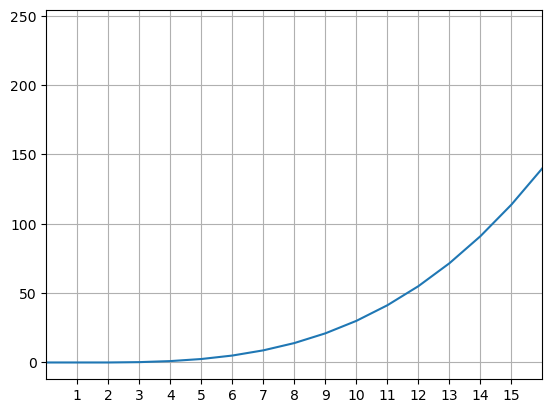

In [59]:
# plot
fig, ax = plt.subplots()
ax.plot(n, c)
plt.grid()
ax.set(xlim=(0, 16), xticks=np.arange(1, 16))       
plt.show()

As we can see from the plot, the minimum number of cups that would generate 100 possible unique combinations is 15. 

## Exercise 2

Use scipy's version of Fisher's exact test to simulate the Lady Tasting Tea problem.

In [3]:
from scipy.stats import fisher_exact

The results of a test could be writen in a 2X2 contingency table:<br> 

Guess/<br>Poured first | Milk | Tea |
--- | --- | --- |
Milk | 4 | 0 | 
Tea | 0 | 4 | 

H0: no association between her guess and what is poured in first:<br>

If p<05 we can reject the null hypotesis. 

In [4]:
pvalue = fisher_exact([[4, 0], [0, 4]])
pvalue

(inf, 0.028571428571428567)

As it can be seen from the p value, the probability of guessing all four correct cups is 2.86%. If the lady would have guessed all four cups of tea, we would reject the null hypotesis that there is no association between her guess and what is poured first.  

## Exercise 3

Take the code from the Examples section of the scipy stats documentation for independent samples t-tests, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

Below example is taken from [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) documentation.

ttest_ind() is a test for the null hypothesis that two independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default. [[11]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) 

T-test check if two means are reliably different from each other. [[10]] 

P-value tell us the likelihood that there is a real difference. [[10]]

In [5]:
from scipy import stats
# random number generator
rng = np.random.default_rng()

In [7]:
# two random sample sizes 
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.8514778750670171, pvalue=0.3947082090529771)

T-value of -0.27 means between two random sample sizes is about 0.27 times different between each other than within each other. 

A P-value of 0.78 means the probability of two random sample sizes having identical mean is 0.78 %, meaning we can reject the null hypothesis that two independent samples have equal average (expected) values.

## 01 - models   

### Exercise 1  
Use numpy and matplotlib to plot the absolute value function.
Research and explain why the absolute value function is not typically used in fitting straight lines to data.

The function we are plotting: 


$$ Cost(m, c) = \sum_i \mid y_i - mx_i - c\mid $$



Below calculation is adapted from a notebook provided on a Machine Learning and Statistics class. 

<IPython.core.display.Javascript object>


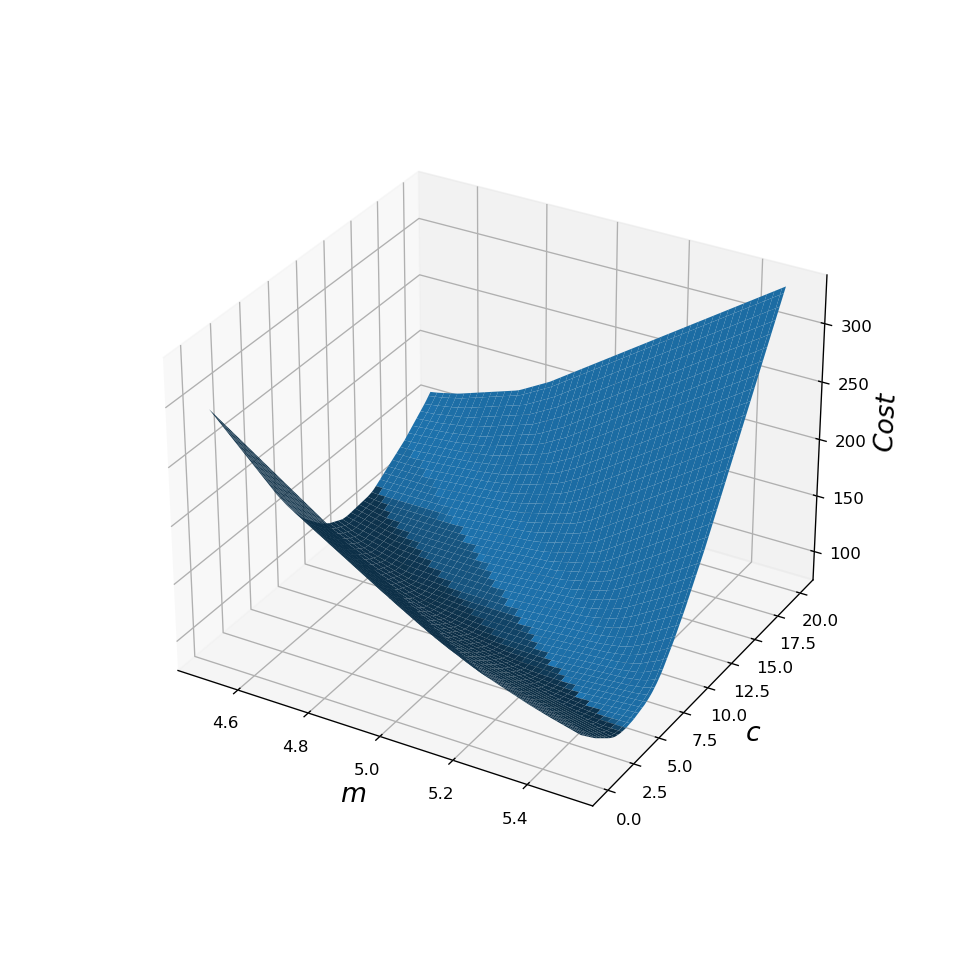

In [22]:
# This code is a little bit involved - don't worry about it.
# Just look at the plot below.

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Fake the data. 
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

# Ask pyplot a 3D set of axes.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Make data.
mvals = np.linspace(4.5, 5.5, 100)
cvals = np.linspace(0.0, 20.0, 100)

# Fill the grid.
mvals, cvals = np.meshgrid(mvals, cvals)

# Flatten the meshes for convenience.
mflat = np.ravel(mvals)
cflat = np.ravel(cvals)

# Calculate the cost of each point on the grid.
C = [np.sum([abs(d[i] - m * w[i] - c) for i in range(w.size)]) for m, c in zip(mflat, cflat)]
C = np.array(C).reshape(mvals.shape)


# Plot the surface.
surf = ax.plot_surface(mvals, cvals, C)

# Set the axis labels.
ax.set_xlabel('$m$', fontsize=16)
ax.set_ylabel('$c$', fontsize=16)
ax.set_zlabel('$Cost$', fontsize=16)

# Show the plot.
plt.show()


### Exercise 2  
Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

```python
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
```

#### Method 1 : minimising the cost


In [11]:
# data points
import numpy as np
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
x = np.array(x)
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

In [12]:
# Calculate the best values for m and c.
import matplotlib.pyplot as plt

# First calculate the means (a.k.a. averages) of w and d.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from w and d.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.103158 and c is 1.049474.


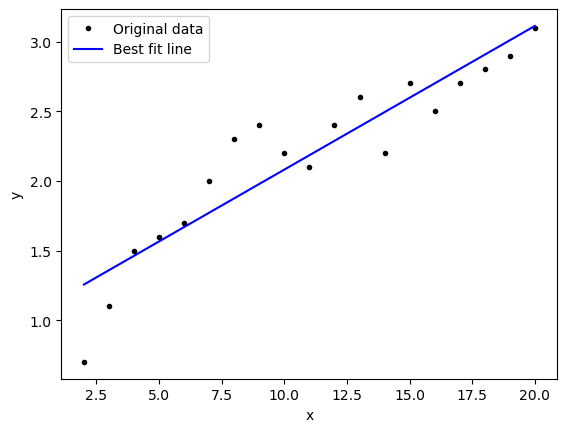

In [13]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot.
plt.show()

## References

1. MyBib Contributors (2019). Harvard Referencing Generator – FREE – (updated for 2019). [online] MyBib. Available at: https://www.mybib.com/tools/harvard-referencing-generator.
2. GitHub. (n.d.). Markdown Cheatsheet · adam-p/markdown-here Wiki. [online] Available at: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lists [Accessed 29 Oct. 2022].
3. www.tutorialspoint.com. (n.d.). Statistics - Combination. [online] Available at: https://www.tutorialspoint.com/statistics/combination.htm# [Accessed 29 Oct. 2022].
4. matplotlib.org. (n.d.). plot(x, y) — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py [Accessed 29 Oct. 2022].
5. www.youtube.com. (n.d.). Fisher’s Exact Test | Lady Tasting Tea. [online] Available at: https://www.youtube.com/watch?v=I9KsLCc-eiQ [Accessed 5 Dec. 2021].
6. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html
7. Scipy.org. (n.d.). scipy.stats.fisher_exact. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html [Accessed 31 Oct. 2022].
8. Laerd Statistics (2018). Independent t-test in SPSS Statistics - Procedure, output and interpretation of the output using a relevant example | Laerd Statistics. [online] Laerd.com. Available at: https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php  [Accessed 01 Nov. 2022].
9. Scipy.org. (2016). scipy.stats.ttest_ind — SciPy v1.9.3 Manual. [online] Available at: https://docs.scipy.org/doc//scipy/reference/generated/scipy.stats.ttest_ind.html?highlight=stats%20ttest_ind#scipy.stats.ttest_ind [Accessed 1 Nov. 2022].
10. StatsCast (2010). StatsCast: What is a t-test? YouTube. Available at: https://www.youtube.com/watch?v=0Pd3dc1GcHc.
11. docs.scipy.org. (n.d.). Statistics (scipy.stats) — SciPy v1.8.0 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/tutorial/stats.html.
12. adrian.pw. (n.d.). apw - Fitting a straight line to data. [online] Available at: https://adrian.pw/blog/fitting-a-line/ [Accessed 19 Nov. 2022].
13. Stack Overflow. (n.d.). python - Mark projected min and max in 3D surface-/contourplot. [online] Available at: https://stackoverflow.com/questions/41911928/mark-projected-min-and-max-in-3d-surface-contourplot [Accessed 19 Nov. 2022].

